**PROJECT TITLE:**
USE OF AI/ML IN IDENTIFYING PATTERNS IN THE MALARIA DATASET THAT INDICATES THE PRESENCE OF MALARIA BASE ON IT'S SYMPTOMS.

**TEAM MEMBERS' FELLOW ID   AND NAMES:**


*  SHEHU ISHAK,     FE/23/6817811



*  IBRAHIM KAMAL LAWAN,     FE/23/89714363
*   RAMLAT SALISU INDABAWA,     FE/23/16034756    



*   FATIMA ISHAQ    FE/23/53645467
*    IJEOMA UGWU   FE/23/17425285


**AIM FOR THE PROJECT:**  
The aim is to help the local primary health care to identify and detect Malaria by it's symptoms.

**DATA SOURCE:**
The data was collected from Dutse General Hospital, Dutse LGA Jigawa State

**ABOUT THE PROBLEM:**

Mostly in the Nigerian primary healthcare, there is lacking of laboratory tools, which directly leads to severe illness to some patients before reaching the hospital, lose of lives to some and inappropriate diagnosis which causes misusage of drugs.
Detecting malaria based solely on symptoms can be challenging because the symptoms malaria can overlap with those of many other diseases. However, if you have access to a malaria data set, you can use machine leaning techniques to identify patterns in the data that might indicate the presence of malaria based on symptoms.

In [ ]:

#importrting the data set
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#the algorithms for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#evaluation libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#splitting the model
from sklearn.model_selection import  train_test_split

#preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/Malaria Dataset.csv")

In [ ]:
df

,GENDER,AGE,WEIGHT,BODY TEMPERATURE,HEADACHE,VOMITTING,DIZZINESS,DIARRHEA,LOSS OF APPETITE,MPS,DIAGONOSIS
0,Male,30,62,38.0,yes,yes,yes,no,yes,positive,malaria
1,Male,10,28,35.0,yes,no,yes,yes,no,negative,none
2,Female,8,26,37.0,no,no,no,no,no,negative,none
3,Female,20,55,36.8,no,yes,no,no,no,negative,none
4,Male,50,68,36.5,no,no,no,no,no,positive,malaria
...,...,...,...,...,...,...,...,...,...,...,...
95,Male,38,68,38.0,yes,yes,yes,no,no,positive,malaria
96,Female,2,10,39.0,yes,yes,yes,no,no,positive,malaria
97,Male,1,9,38.0,yes,no,yes,yes,no,positive,malaria
98,Female,15,45,37.0,no,no,no,yes,no,negative,none


**DATA PREPROCESSING**

In [ ]:
#checking for missing values
print(df.isnull().sum())

GENDER               0
AGE                  0
WEIGHT               0
BODY TEMPERATURE     0
HEADACHE             0
VOMITTING            0
DIZZINESS            0
DIARRHEA             0
LOSS OF APPETITE     0
MPS                  0
DIAGONOSIS           0
dtype: int64


In [ ]:
df.columns

Index(['GENDER', 'AGE', 'WEIGHT', 'BODY TEMPERATURE ', 'HEADACHE', 'VOMITTING',
       'DIZZINESS', 'DIARRHEA', 'LOSS OF APPETITE', 'MPS', 'DIAGONOSIS'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GENDER             100 non-null    object 
 1   AGE                100 non-null    int64  
 2   WEIGHT             100 non-null    int64  
 3   BODY TEMPERATURE   100 non-null    float64
 4   HEADACHE           100 non-null    object 
 5   VOMITTING          100 non-null    object 
 6   DIZZINESS          100 non-null    object 
 7   DIARRHEA           100 non-null    object 
 8   LOSS OF APPETITE   100 non-null    object 
 9   MPS                100 non-null    object 
 10  DIAGONOSIS         100 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 8.7+ KB


In [ ]:
#displaying the dataset statistical describtion
df.describe()

,AGE,WEIGHT,BODY TEMPERATURE
count,100.000000,100.000000,100.00000
mean,24.220000,46.420000,37.82900
std,16.292515,20.131477,1.53467
min,1.000000,5.000000,34.00000
25%,12.750000,30.750000,37.00000
50%,20.500000,48.000000,38.00000
75%,33.000000,63.000000,39.00000
max,80.000000,80.000000,42.00000


In [ ]:
#removing space in the DIAGONOSIS column
df.DIAGONOSIS = df.DIAGONOSIS.str.replace(' ', '')
df['DIAGONOSIS'].value_counts()

malaria    77
none       23
Name: DIAGONOSIS, dtype: int64

**EXPOLOLATRY DATA ANALYSIS(EDA)**

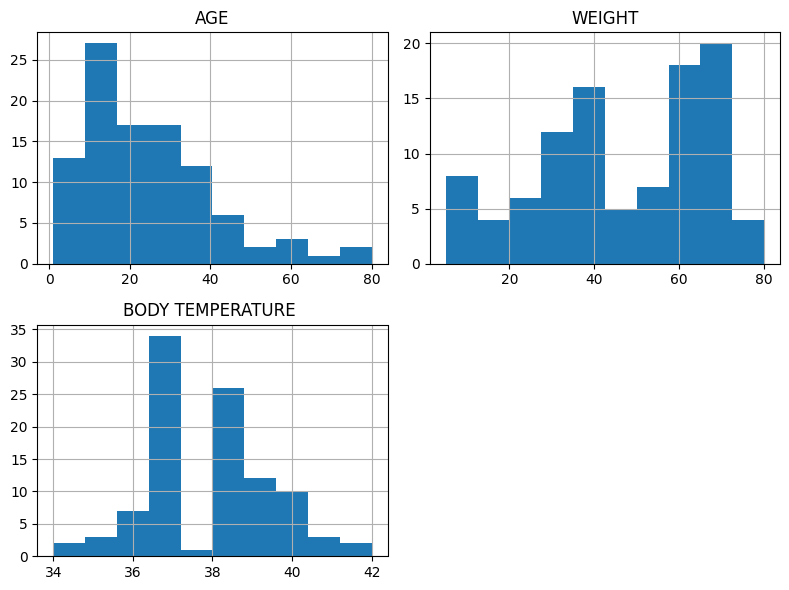

In [ ]:
#histrogram to display the Age, weight and tempreture
df.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

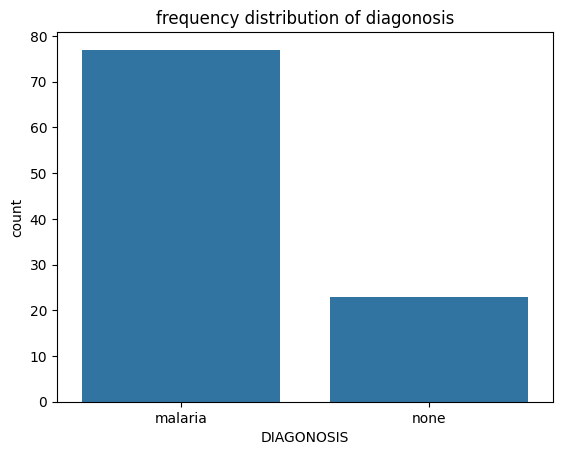

In [ ]:
#bar chart for diagonosis
sns.countplot(x='DIAGONOSIS', data=df)
plt.title("frequency distribution of diagonosis")
plt.show()

# New Section

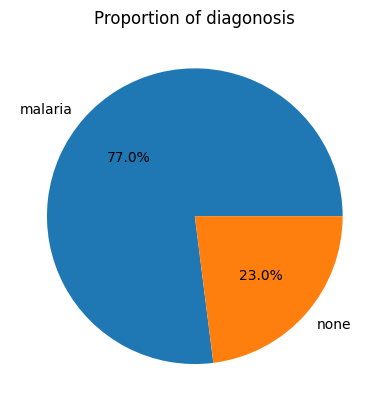

In [ ]:
#pie chart for diagonosis
plt.pie(df['DIAGONOSIS'].value_counts(),labels=df['DIAGONOSIS'].unique(),autopct="%1.1f%%")
plt.title("Proportion of diagonosis")
plt.show()

In [ ]:
df['DIAGONOSIS'].value_counts()

malaria    77
none       23
Name: DIAGONOSIS, dtype: int64

In [ ]:
columns_to_encode = ['GENDER', 'HEADACHE', 'VOMITTING',
       'DIZZINESS', 'DIARRHEA', 'LOSS OF APPETITE', 'MPS','DIAGONOSIS']
# Function to encode categorical columns
def encode_columns(df, columns):
  """
  Encodes categorical columns in a pandas DataFrame using get_dummies.

  Args:
      df: The pandas DataFrame containing the columns to encode.
      columns: A list of column names to encode.

  Returns:
      A new pandas DataFrame with encoded columns.
  """
  encoded_df = pd.get_dummies(df, columns=columns, drop_first=True)
  df_remaining = df.drop(columns, axis=1)  # Drop encoded columns from copy
  return pd.concat([encoded_df, df_remaining], axis=1)
  #encoded_df = pd.get_dummies(df, columns=columns, drop_first=True)  # Avoids dummy trap
  #return encoded_df.merge(df ,[cols for cols in df.columns if cols not in columns], how='inner')

# Encode the columns
df = encode_columns(df.copy(), columns_to_encode)

# Print the encoded dataframe
print(df)

    AGE  WEIGHT  BODY TEMPERATURE   GENDER_Male  HEADACHE_yes  HEADACHE_yes    \
0    30      62               38.0            1             0               1   
1    10      28               35.0            1             0               1   
2     8      26               37.0            0             0               0   
3    20      55               36.8            0             0               0   
4    50      68               36.5            1             0               0   
..  ...     ...                ...          ...           ...             ...   
95   38      68               38.0            1             1               0   
96    2      10               39.0            0             1               0   
97    1       9               38.0            1             1               0   
98   15      45               37.0            0             0               0   
99    4      18               37.0            1             1               0   

    VOMITTING_yes  DIZZINES

In [ ]:
X = df.drop('DIAGONOSIS_none', axis =1)
y = df['DIAGONOSIS_none']

In [ ]:
X

,AGE,WEIGHT,BODY TEMPERATURE,GENDER_Male,HEADACHE_yes,HEADACHE_yes,VOMITTING_yes,DIZZINESS_yes,DIARRHEA_yes,LOSS OF APPETITE_yes,MPS_positive,AGE,WEIGHT,BODY TEMPERATURE
0,30,62,38.0,1,0,1,1,1,0,1,1,30,62,38.0
1,10,28,35.0,1,0,1,0,1,1,0,0,10,28,35.0
2,8,26,37.0,0,0,0,0,0,0,0,0,8,26,37.0
3,20,55,36.8,0,0,0,1,0,0,0,0,20,55,36.8
4,50,68,36.5,1,0,0,0,0,0,0,1,50,68,36.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,38,68,38.0,1,1,0,1,1,0,0,1,38,68,38.0
96,2,10,39.0,0,1,0,1,1,0,0,1,2,10,39.0
97,1,9,38.0,1,1,0,0,1,1,0,1,1,9,38.0
98,15,45,37.0,0,0,0,0,0,1,0,0,15,45,37.0


In [ ]:
y

0     0
1     1
2     1
3     1
4     0
     ..
95    0
96    0
97    0
98    1
99    0
Name: DIAGONOSIS_none, Length: 100, dtype: uint8

In [ ]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 14), (20, 14), (80,), (20,))

In [ ]:
#model buliding
D_model = DecisionTreeClassifier() #decesion tree model
R_model = RandomForestClassifier() #random forest
K_model = KNeighborsClassifier()  #KNN model

In [ ]:
decision_model = DecisionTreeClassifier()
decision_model.fit(X_train, y_train)
y_predict = decision_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test , y_predict)
accuracy

1.0

In [ ]:
random_model = RandomForestClassifier()
random_model.fit(X_train, y_train)
y_predict = random_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test , y_predict)
accuracy

1.0

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_predict = knn_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test , y_predict)
accuracy

0.8

In [ ]:
#fitting the models
#Decision tree
D_model.fit(X_train,y_train)
d_pred = D_model.predict(X_test)

#random forest
R_model.fit(X_train,y_train)
r_pred = R_model.predict(X_test)

#knn
K_model.fit(X_train,y_train)
k_pred = K_model.predict(X_test)

CONCLUTION :   





Best on the model that we create ,we find out that the KNN algorithms is has the accuracy in terms of identifying the patterns and presence of malaria,best on the syptoms.